# Introduction

For starters we will use ten different actors, denoted by different video id:s.


We will apply LOGO CV (Leave One Group Out cross-validation)

We will later have to take into account variables like mode (prosody or vocalization) and intensity (1-4) in the cross validation scheme. 

However for the first run it will be fine to include all without taking such factors into account.



In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy
from dotenv import load_dotenv

# Working dir

In [2]:
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.preprocessing.sql_handling.execute_sql import execute_sql_pandas

# Paths

In [4]:
load_dotenv()

# path to save figures
output_path = os.getenv("VIDEO_OUT")

# Global configuration path
glob_conf_path = '../global_config.py'

In [5]:
output_path

'/home/tim/work/su-thesis-project/emotional-recognition/files/tests/out/video/'

# Load global variables

In [6]:
exec(open(glob_conf_path).read())

# Select data from DB

We only select data that satisfies following three conditions:

* Success == 1
* Confidence rate >= 0.98
* mix (mixed emotions) = False(0)

We also only select the following six video_ids: 'A101', 'A102', 'A18', 'A200'

In [7]:
AU_COLS = ['AU01_r',
'AU02_r',
'AU04_r',
'AU05_r',
'AU06_r',
'AU07_r',
'AU09_r',
'AU10_r',
'AU12_r',
'AU14_r',
'AU15_r',
'AU17_r',
'AU20_r',
'AU23_r',
'AU25_r',
'AU26_r',
'AU45_r']

In [8]:
#query = """SELECT filename,
#video_id,
#emotion_1,
#emotion_1_id,
#frame,
#success,
#confidence,
#AU01_r,
#AU02_r,
#AU04_r,
#AU05_r,
#AU06_r,
#AU07_r,
#AU09_r,
#AU10_r,
#AU12_r,
#AU14_r,
#AU15_r,
#AU17_r,
#AU20_r,
#AU23_r,
#AU25_r,
#AU26_r,
#AU45_r
#FROM openface
#WHERE mix = 0
#AND (intensity_level = 4 OR emotion_1 = 'neu')
#AND situation = 1 
#AND mode = 'v'
#AND video_id IN ('A101', 'A102', 'A18', 'A200', 'A303', 'A227', 'A21', 'A18');"""
#df, read_duration = execute_sql_pandas(query)

In [9]:
query = """SELECT filename,
video_id,
emotion_1,
emotion_1_id,
frame,
success,
confidence,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r
FROM openface
WHERE mix = 0
AND emotion_1 in ('ang', 'sad');
"""
df, read_duration = execute_sql_pandas(query)

In [10]:
print("query executed in: {} seconds".format(read_duration))

query executed in: 44.602 seconds


In [11]:
df

,filename,video_id,emotion_1,emotion_1_id,frame,success,confidence,AU01_r,AU02_r,AU04_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A223_ang_p_4,A223,ang,12,1,1,1,0.00,0.00,0.70,...,0.92,0.62,0.30,0.33,1.84,0.17,0.59,0.00,0.0,0.00
1,A223_ang_p_4,A223,ang,12,2,1,1,0.03,0.00,0.81,...,0.97,0.61,0.27,0.27,1.84,0.11,0.37,0.00,0.0,0.07
2,A223_ang_p_4,A223,ang,12,3,1,1,0.03,0.00,0.86,...,1.02,0.63,0.24,0.17,1.82,0.05,0.32,0.00,0.0,0.07
3,A223_ang_p_4,A223,ang,12,4,1,1,0.00,0.00,0.86,...,1.07,0.69,0.27,0.12,1.80,0.05,0.41,0.00,0.0,0.05
4,A223_ang_p_4,A223,ang,12,5,1,1,0.00,0.00,0.89,...,1.08,0.75,0.29,0.18,1.85,0.00,0.51,0.00,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110447,A91_sad_p_3,A91,sad,6,196,1,1,0.04,0.00,0.00,...,0.64,0.71,0.00,0.00,0.00,0.00,0.00,1.64,0.0,0.03
110448,A91_sad_p_3,A91,sad,6,197,1,1,0.00,0.00,0.00,...,0.57,0.67,0.00,0.04,0.02,0.00,0.00,1.54,0.0,0.04
110449,A91_sad_p_3,A91,sad,6,198,1,1,0.00,0.01,0.00,...,0.50,0.64,0.00,0.10,0.02,0.00,0.00,1.44,0.0,0.02
110450,A91_sad_p_3,A91,sad,6,199,1,1,0.00,0.10,0.00,...,0.50,0.64,0.00,0.17,0.05,0.00,0.00,1.38,0.0,0.02


Total number of instances: 110452

Number of Instances per File (before data cleaning)
A205_sad_v_3         1549
A205_sad_v_4         1437
A205_sad_v_1         1214
A205_sad_v_2         1161
A220_sad_v_4         1084
                     ... 
A050121-R_ang_p_1      51
A303_ang_v_1           47
A050121-R_sad_p_1      44
A337_ang_v_1           42
A050121-R_ang_v_2      37
Name: filename, Length: 491, dtype: int64



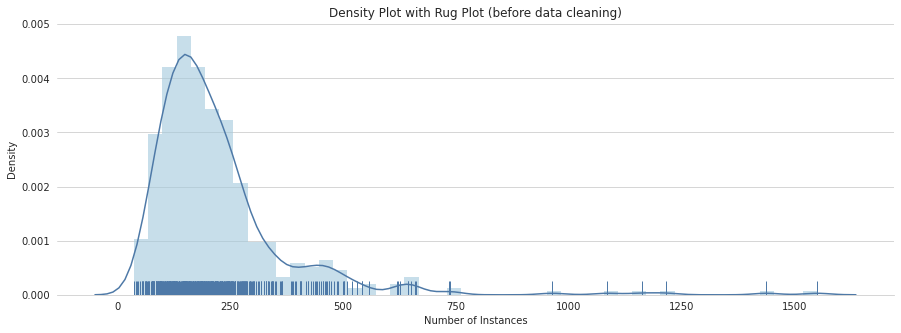


Number of Instances per Video id (before data cleaning)
A205         9827
A220         7759
A223         6956
A55          6400
A102         5950
A67          4567
A221         4098
A103         3929
A218         3756
A101         3503
A201         3457
A18          3436
A74          3247
A207         3233
A26          3211
A200         2997
A334         2984
A323         2964
A72          2936
A64          2669
A91          2521
A34          2436
A332         2405
A227         2376
A65          2293
A75          2187
A327         1809
A21          1780
A303         1753
A337         1698
A050121-R    1315
Name: video_id, dtype: int64


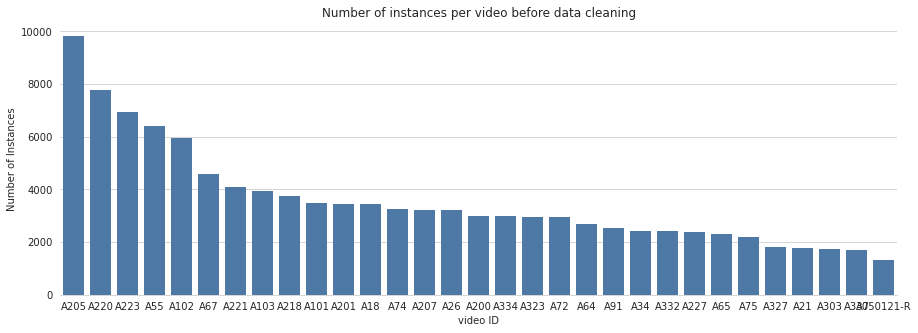


Number of Instances per Emotion (before data cleaning)
sad    59671
ang    50781
Name: emotion_1, dtype: int64


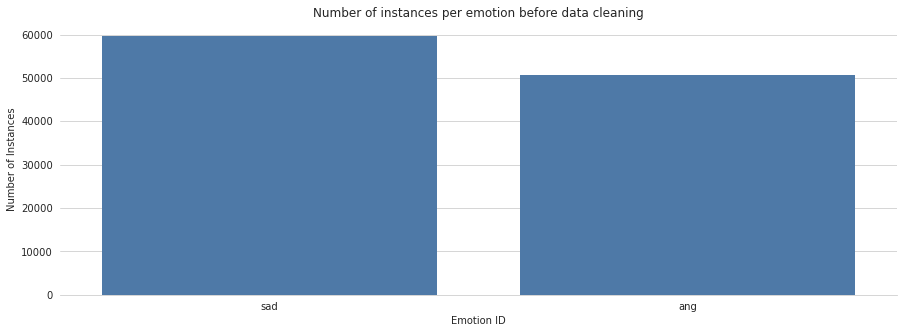


Number of Instances per Success Status (before data cleaning)
1    110114
0       338
Name: success, dtype: int64


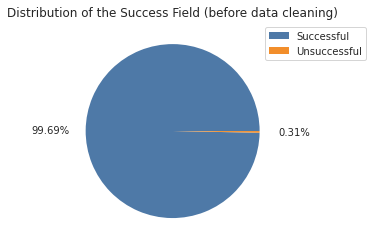


Percentage of Instances per Confidence Rate (before data cleaning)
0    0.002906
1    0.997094
Name: confidence, dtype: float64


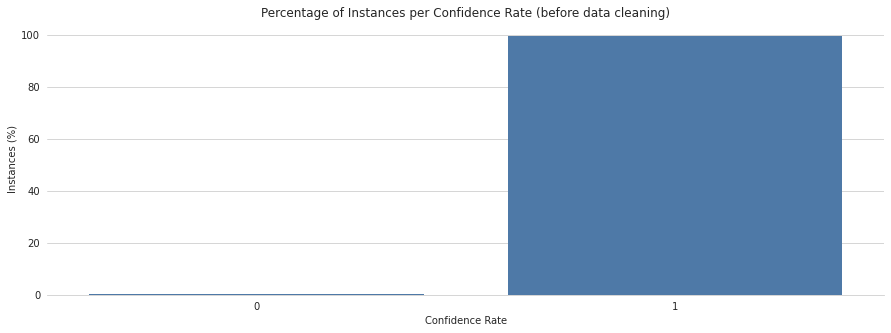

In [12]:
print("Total number of instances: {}".format(len(df)))
print()


print("Number of Instances per File (before data cleaning)")
file_val_counts_original = df["filename"].value_counts()
print(file_val_counts_original)
print()


x = file_val_counts_original.values
plt.figure(figsize=(15,5))
sns.distplot(x, rug=True, norm_hist=True,
             rug_kws={'color': blue_shades[0],'alpha':1},
             kde_kws={'color': blue_shades[0],'alpha':1},
             hist_kws={'color': blue_shades[1], 'alpha':0.6}
            )
plt.xlabel('Number of Instances')
plt.ylabel('Density')
plt.grid(False,axis='x')
plt.savefig(os.path.join(output_path,'charts','report_distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.title('Density Plot with Rug Plot (before data cleaning)')
plt.savefig(os.path.join(output_path,'charts','distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()


print("Number of Instances per Video id (before data cleaning)")
video_val_counts_original = df["video_id"].value_counts()
print(video_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(video_val_counts_original.index, video_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per video before data cleaning")
plt.xlabel('video ID')
plt.ylabel('Number of Instances')
plt.show()
print()


print("Number of Instances per Emotion (before data cleaning)")
emotion_val_counts_original = df["emotion_1"].value_counts()
print(emotion_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(emotion_val_counts_original.index, emotion_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per emotion before data cleaning")
plt.xlabel('Emotion ID')
plt.ylabel('Number of Instances')
#plt.xticks(rotation=45)
plt.show()
print()

print("Number of Instances per Success Status (before data cleaning)")
success_val_counts_original = df["success"].value_counts()
print(success_val_counts_original)
plt.figure()
plt.pie(success_val_counts_original.values, autopct='%1.2f%%', pctdistance= 1.4, colors=palette_def)
plt.legend(['Successful','Unsuccessful'],bbox_to_anchor=(0.9, 1))
plt.savefig(os.path.join(output_path,'charts','report_success_before_cleaning.svg'), bbox_inches = 'tight')
plt.title("Distribution of the Success Field (before data cleaning)")
plt.savefig(os.path.join(output_path,'charts','success_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()

print("Percentage of Instances per Confidence Rate (before data cleaning)")
confidence_val_counts_original = df["confidence"].value_counts(normalize=True).sort_index()
print(confidence_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(confidence_val_counts_original.index, 100*confidence_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.xlabel('Confidence Rate')
plt.ylabel('Instances (%)')
plt.savefig(os.path.join(output_path,'charts','report_confidence_before_cleaning.svg'), bbox_inches = 'tight')
plt.title("Percentage of Instances per Confidence Rate (before data cleaning)")
plt.savefig(os.path.join(output_path,'charts','confidence_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()

In [13]:
print("Number of Instances per video id for every filename")
video_val_counts_original = df[['video_id','filename']].groupby(["video_id"]).filename.nunique().reset_index()
print(video_val_counts_original)
print()

Number of Instances per video id for every filename
     video_id  filename
0   A050121-R        16
1        A101        16
2        A102        16
3        A103        16
4         A18        16
5        A200        16
6        A201        16
7        A205        16
8        A207        16
9         A21        16
10       A218        16
11       A220        16
12       A221        16
13       A223        16
14       A227        16
15        A26        16
16       A303        16
17       A323        16
18       A327         8
19       A332        16
20       A334        16
21       A337        16
22        A34        16
23        A55        22
24        A64        16
25        A65        16
26        A67        16
27        A72        16
28        A74        16
29        A75        13
30        A91        16



## Number of frames for every filename

Number of frames for every filename


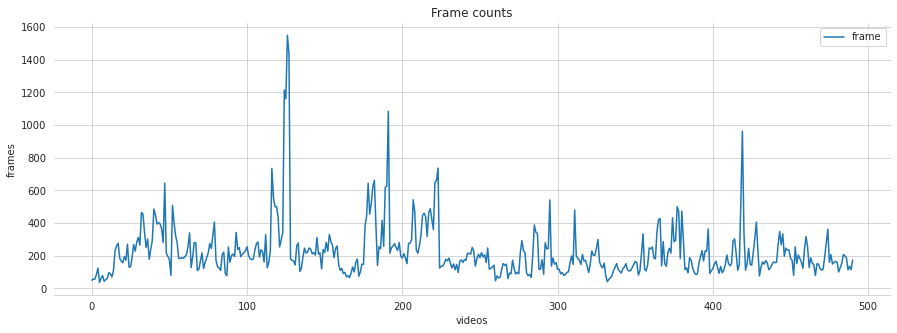

In [14]:
print("Number of frames for every filename")
frame_counts = df[['frame','filename']].groupby(["filename"]).frame.nunique().reset_index()
frame_counts.plot(figsize=(15,5))
plt.title("Frame counts")
plt.xlabel('videos')
plt.ylabel('frames')
plt.show()

## Missing frames grouped by video

In [15]:
def get_unsuccessfull(df):
    ratios = []
    
    # iterate over a df for every filename
    for filename, df_filename in df.groupby('filename'):
        total = df_filename.shape[0]    
        
        # get the sum of all rows with success and greater than 0.98 confidence in df
        successful = (df_filename['success'] == 1).sum()
        confident = (df_filename['confidence'] > 0.98).sum() 

        # calculate ratio between unsuccess or low confidence rows and total number of rows
        success_ratio = successful/total 
        confidence_ratio = confident/total

        if success_ratio < 1 or confidence_ratio < 1:   
            ratios.append({"filename": filename,
                                  "success_ratio": success_ratio,
                                  "confidence_ratio": confidence_ratio})
    # create df from records
    ret_df = pd.DataFrame.from_records(ratios)
        
    # sort values (highest success rate / confident rate first
    ret_df.sort_values(by=['success_ratio', 'confidence_ratio'], inplace = True)
    
    return ret_df

In [16]:
df_ratios = get_unsuccessfull(df)

In [17]:
df_ratios

,filename,success_ratio,confidence_ratio
1,A303_sad_v_4,0.468208,0.497110
10,A74_sad_v_4,0.690476,0.710317
5,A55_sad_v_4_ver1,0.732240,0.770492
9,A74_sad_p_2,0.760976,0.770732
2,A332_sad_v_4,0.875260,0.873181
3,A34_sad_p_4,0.976119,0.982090
0,A101_ang_p_4,0.994048,0.988095
7,A74_ang_p_2,0.995951,1.000000
8,A74_ang_v_2,1.000000,0.994186
6,A64_sad_v_4,1.000000,0.997260


<Figure size 1080x360 with 0 Axes>

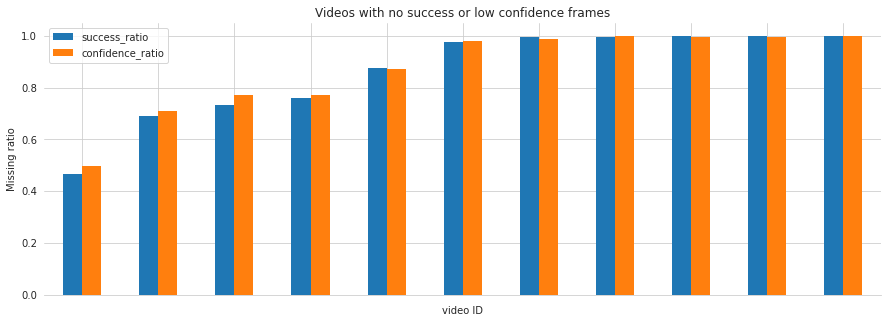

In [18]:
plt.figure(figsize=(15,5))
ax = df_ratios.plot(figsize=(15,5), kind = "bar")
ax.xaxis.set_ticklabels([])

plt.title("Videos with no success or low confidence frames")
plt.xlabel('video ID')
plt.ylabel('Missing ratio')
plt.show()

## Clean the data

Remove all files with too many missing frames

In [19]:
threshold = 0.9

# seems to be some overlapping issue here, look into AND and OR statements

filenames_to_remove = df_ratios[(df_ratios.success_ratio <= threshold) | (df_ratios.confidence_ratio <= threshold)].filename
filenames_to_keep = df_ratios[(df_ratios.success_ratio > threshold) & (df_ratios.confidence_ratio > threshold)].filename
df = df[df.filename.isin(filenames_to_remove) == False]

Inspect result after cleaning

<Figure size 1080x360 with 0 Axes>

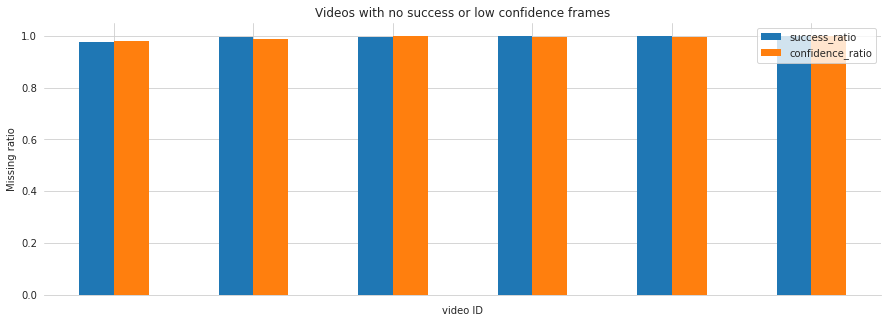

In [20]:
df_new_ratios = get_unsuccessfull(df)

plt.figure(figsize=(15,5))
ax = df_new_ratios.plot(figsize=(15,5), kind = "bar")
ax.xaxis.set_ticklabels([])

plt.title("Videos with no success or low confidence frames")
plt.xlabel('video ID')
plt.ylabel('Missing ratio')
plt.show()

In [21]:
# save an example of a df with missing frames
df_example = df[df['filename'] == filenames_to_keep.iloc[0]]
save_path = os.path.join(output_path, 'success_ratio_90_and_over.csv')
df_example.to_csv(save_path, index=None, header=True)

## Interpolate missing values

In [22]:
df.shape

(109158, 24)

In [23]:
df.isna().sum().sum()

0

In [24]:
# set the AU value of all rows with bad frames to NaN
for au in AU_COLS:
    df.loc[(df['success'] != 1) | (df['confidence'] != 1), au] = np.NaN

In [25]:
df.isna().sum().sum()

238

In [26]:
pd.options.mode.chained_assignment = None  # default='warn'

for filename in filenames_to_keep:    
    df_filename = df[df['filename'] ==  filename]
    
    #print("before")
    #print(df.isna().sum().sum())
    
    df_filename[AU_COLS] = df_filename[AU_COLS].interpolate(method="linear")
    
    df[df['filename'] ==  filename] = df_filename
    
    #print("after")
                                                            
    #print(df.isna().sum().sum())    
    

In [27]:
df.isna().sum().sum()

85

In [28]:
# drop rows that couldn't be interpolated
df = df.dropna()

In [29]:
df.isna().sum().sum()

0

### Plot some examples of interpolated data

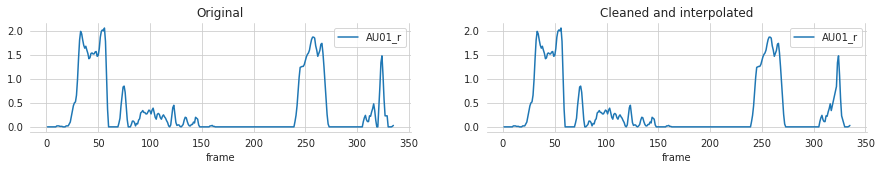

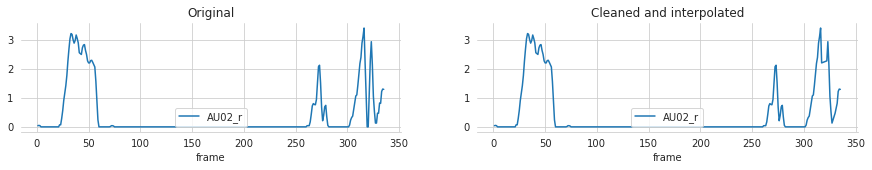

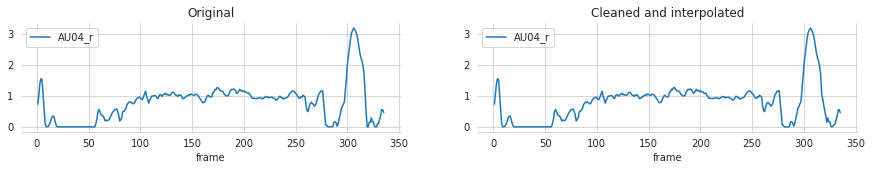

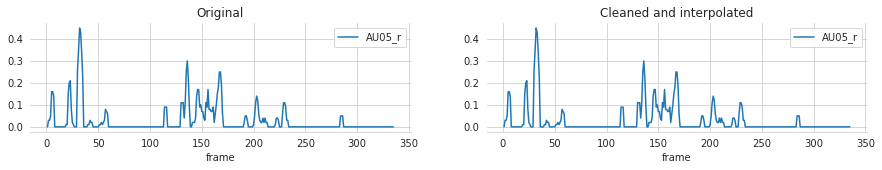

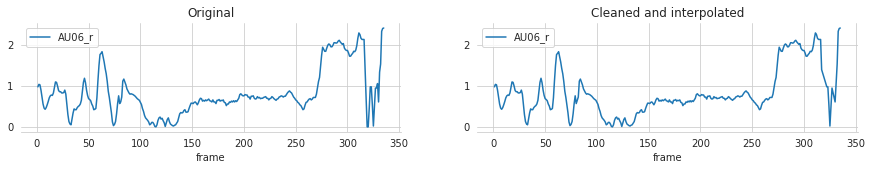

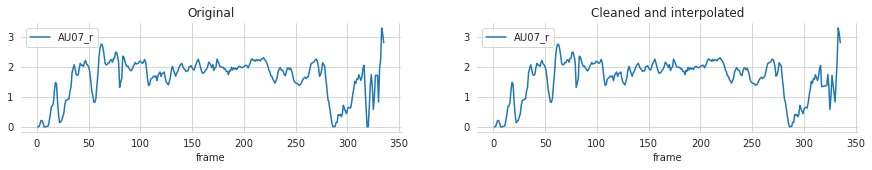

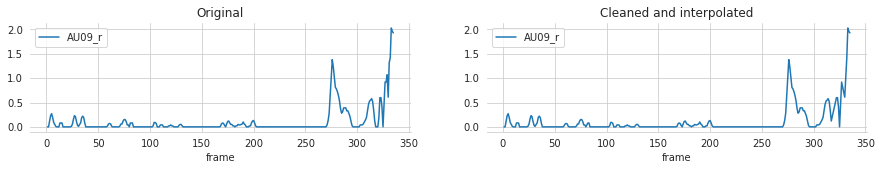

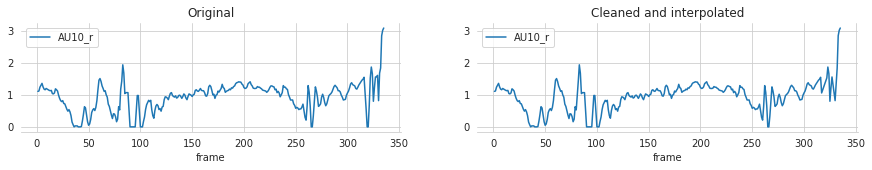

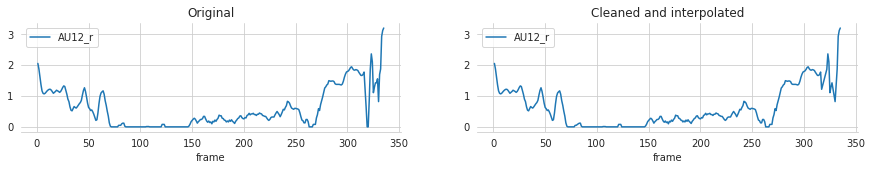

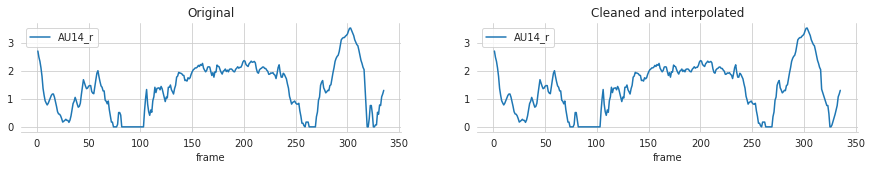

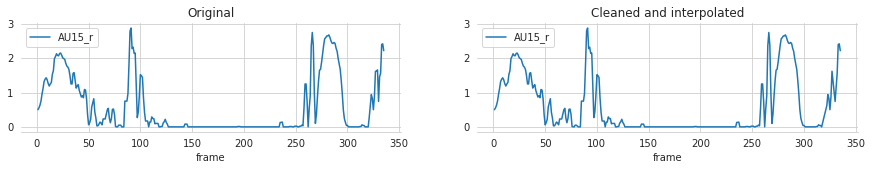

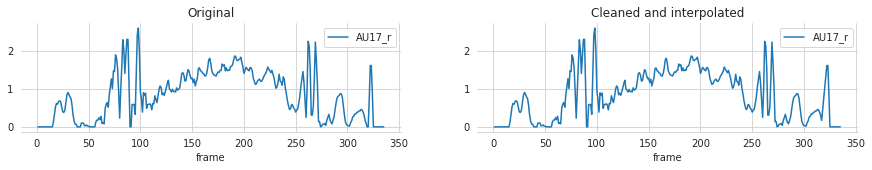

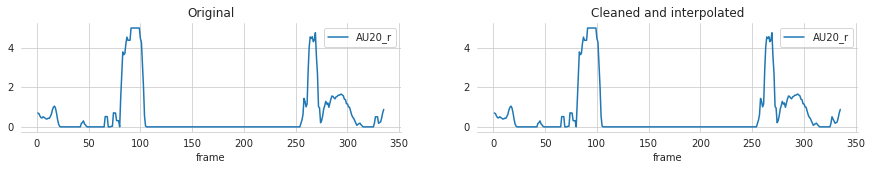

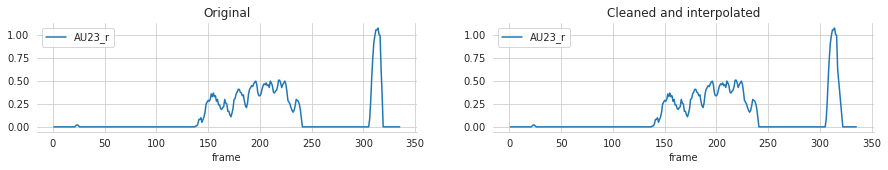

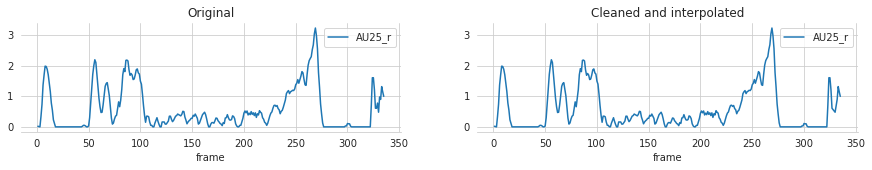

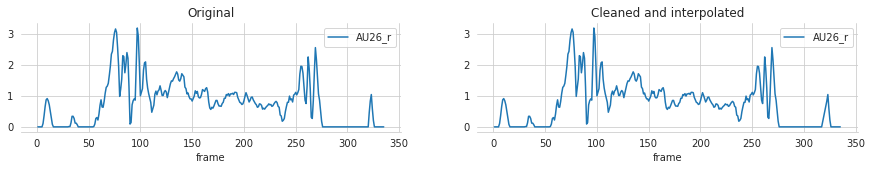

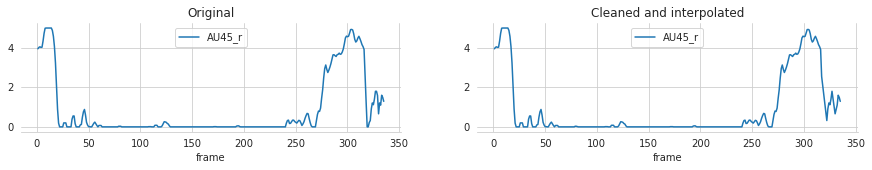

In [30]:
df_example_cleaned = df[df['filename'] == filenames_to_keep.iloc[0]]

for au in AU_COLS:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].set_title("Original")
    axes[1].set_title("Cleaned and interpolated")

    df_example.plot(x = 'frame', y = au, ax=axes[0], figsize=(15, 2))
    df_example_cleaned.plot(x = 'frame', y = au, ax=axes[1], figsize=(15, 2))

# Normalize training set

Merge on filename index... Merge with metadata afterwards...

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

In [31]:
df.reset_index(drop = True, inplace=True)

In [32]:
from sklearn import preprocessing

# get the metadata from original dataframe

df_metadata = df[['filename', "frame", "video_id", "emotion_1_id"]]

print(df_metadata.shape)

# get only features
X = df.drop(columns=['filename', "frame", "video_id", "emotion_1", "emotion_1_id", "confidence", "success"])
# check for null values
print(np.isnan(np.sum(X)))


min_max_scaler = preprocessing.MinMaxScaler()

# Fit and transform features
X_scaled = min_max_scaler.fit_transform(X)

# check for null values
print(np.isnan(np.sum(X_scaled)))


# Create a dataframe from normalized features
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns.to_list())
print(X_scaled_df.isna().sum().sum())

print(X_scaled_df.shape)


# join back on index with filename dataframe
X_scaled_df = df_metadata.join(X_scaled_df)
print(X_scaled_df.isna().sum().sum())


(109153, 4)
AU01_r    False
AU02_r    False
AU04_r    False
AU05_r    False
AU06_r    False
AU07_r    False
AU09_r    False
AU10_r    False
AU12_r    False
AU14_r    False
AU15_r    False
AU17_r    False
AU20_r    False
AU23_r    False
AU25_r    False
AU26_r    False
AU45_r    False
dtype: bool
False
0
(109153, 17)
0


In [33]:
df_metadata

,filename,frame,video_id,emotion_1_id
0,A223_ang_p_4,1,A223,12
1,A223_ang_p_4,2,A223,12
2,A223_ang_p_4,3,A223,12
3,A223_ang_p_4,4,A223,12
4,A223_ang_p_4,5,A223,12
...,...,...,...,...
109148,A91_sad_p_3,196,A91,6
109149,A91_sad_p_3,197,A91,6
109150,A91_sad_p_3,198,A91,6
109151,A91_sad_p_3,199,A91,6


In [34]:
X_scaled_df

,filename,frame,video_id,emotion_1_id,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A223_ang_p_4,1,A223,12,0.000,0.000000,0.140,0.000000,0.0,0.0,...,0.186613,0.124,0.064240,0.066,0.368,0.034,0.140811,0.000,0.0,0.000
1,A223_ang_p_4,2,A223,12,0.006,0.000000,0.162,0.000000,0.0,0.0,...,0.196755,0.122,0.057816,0.054,0.368,0.022,0.088305,0.000,0.0,0.014
2,A223_ang_p_4,3,A223,12,0.006,0.000000,0.172,0.000000,0.0,0.0,...,0.206897,0.126,0.051392,0.034,0.364,0.010,0.076372,0.000,0.0,0.014
3,A223_ang_p_4,4,A223,12,0.000,0.000000,0.172,0.000000,0.0,0.0,...,0.217039,0.138,0.057816,0.024,0.360,0.010,0.097852,0.000,0.0,0.010
4,A223_ang_p_4,5,A223,12,0.000,0.000000,0.178,0.000000,0.0,0.0,...,0.219067,0.150,0.062099,0.036,0.370,0.000,0.121718,0.000,0.0,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109148,A91_sad_p_3,196,A91,6,0.008,0.000000,0.000,0.006173,0.0,0.0,...,0.129817,0.142,0.000000,0.000,0.000,0.000,0.000000,0.328,0.0,0.006
109149,A91_sad_p_3,197,A91,6,0.000,0.000000,0.000,0.000000,0.0,0.0,...,0.115619,0.134,0.000000,0.008,0.004,0.000,0.000000,0.308,0.0,0.008
109150,A91_sad_p_3,198,A91,6,0.000,0.002151,0.000,0.000000,0.0,0.0,...,0.101420,0.128,0.000000,0.020,0.004,0.000,0.000000,0.288,0.0,0.004
109151,A91_sad_p_3,199,A91,6,0.000,0.021505,0.000,0.000000,0.0,0.0,...,0.101420,0.128,0.000000,0.034,0.010,0.000,0.000000,0.276,0.0,0.004


In [35]:
save_path = os.path.join(output_path, 'video_data_time_series_ang_sad.csv')
X_scaled_df.to_csv(save_path, index=None, header=True)